
# 🧠 **Clustering Class Activity: Customer Segmentation using Machine Learning**

### 📌 **Learning Objectives**

By the end of this activity, students will be able to:

* Understand unsupervised learning and clustering
* Apply feature scaling
* Implement multiple clustering algorithms
* Choose the optimal number of clusters
* Interpret cluster outputs
* Save a trained clustering model for deployment

---



## 🔹 Step 1: Import Required Libraries

### 📝 **Task**

Import libraries for:

* Data handling
* Visualization
* Clustering
* Evaluation
* Model saving

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import joblib

## 🔹 Step 2: Load and Inspect Dataset
📝 Task

- Load the dataset
- Display first 5 rows
- Check dataset shape and column names

In [1]:
import os
os.getcwd()

'/Users/apple/Documents/laiba/Apps/Jupyter-venv/ICLR-Lab/AI COURSE/Customer Segmentation (Clustering)'

In [2]:
os.listdir()

['Mall_Customers.csv', '.ipynb_checkpoints', 'mallCustomer.ipynb']

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape, df.columns


((200, 5),
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'))

**📌 Insight**

- No target variable → unsupervised learning
- CustomerID is not useful for clustering
----



## 🔹 Step 3: Basic Data Exploration

### 📝 **Task**

Check:

* Missing values
* Data types
* Summary statistics

---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

In [ ]:
df.describe()


---

### 📌 **Insight**

* Dataset is clean
* Numerical features are suitable for clustering

---



## 🔹 Step 4: Feature Selection

### 📝 **Task**

Select meaningful features for clustering.

We will use:

* `Annual Income (k$)`
* `Spending Score (1-100)`

---

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


---

### 📌 **Insight**

* These features capture **customer purchasing behavior**
* 2D features allow easy visualization

---



## 🔹 Step 5: Data Visualization (Before Clustering)

### 📝 **Task**

Visualize customers using a scatter plot.

---



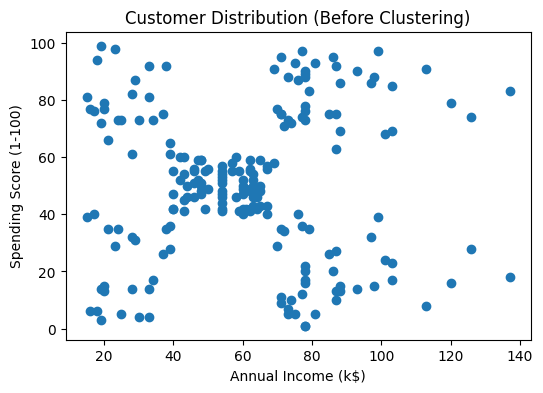

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution (Before Clustering)")
plt.show()

---

### 📌 **Insight**

* Natural groupings are visible
* Clustering seems appropriate

---



## 🔹 Step 6: Feature Scaling

### 📝 **Task**

Apply **StandardScaler** to normalize features.

---




In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

### 📌 **Why Scaling is Important**

* Distance-based models (KMeans, DBSCAN) are sensitive to scale
* Ensures fair contribution of all features

---



## 🔹 Step 7: Finding Optimal Number of Clusters (Elbow Method)

### 📝 **Task**

Use the **Elbow Method** to find the best value of `k`.

---


In [13]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


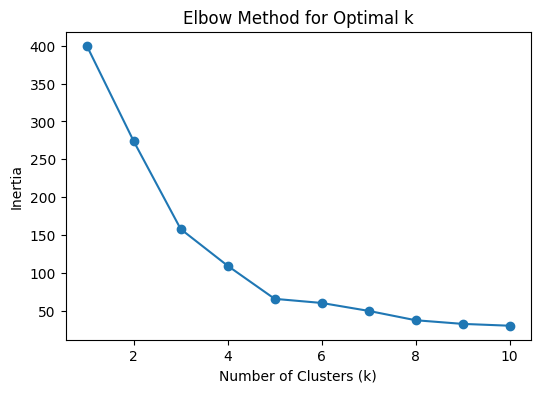

In [14]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


---

### 📌 **Insight**

* The “elbow” usually appears around **k = 5**
* Beyond this, improvement slows down

---





## 🔹 Step 8: KMeans Clustering

### 📝 **Task**

Apply **KMeans** with optimal `k`.

---

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = clusters

---

## 🔹 Step 9: Visualize KMeans Clusters

### 📝 **Task**

Plot clusters with different colors.

---


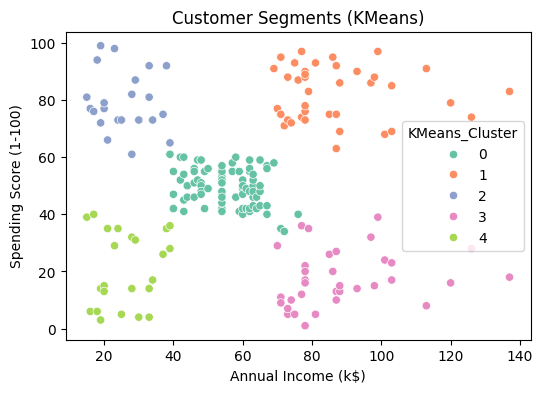

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X.iloc[:,0],
    y=X.iloc[:,1],
    hue=df['KMeans_Cluster'],
    palette='Set2'
)
plt.title("Customer Segments (KMeans)")
plt.show()


---

### 📌 **Insight**

* Each cluster represents a customer segment
* Useful for targeted marketing strategies

---


## 🔹 Step 10: Silhouette Score

### 📝 **Task**

Evaluate clustering quality using **Silhouette Score**.

---

In [17]:
sil_score = silhouette_score(X_scaled, clusters)
sil_score

np.float64(0.5546571631111091)

---

### 📌 **Interpretation**

* Score close to **1** → well-separated clusters
* Around **0.4–0.6** is acceptable for real data

---





## 🔹 Step 11: Hierarchical Clustering (Dendrogram)

### 📝 **Task**

Visualize hierarchical relationships using a dendrogram.

---

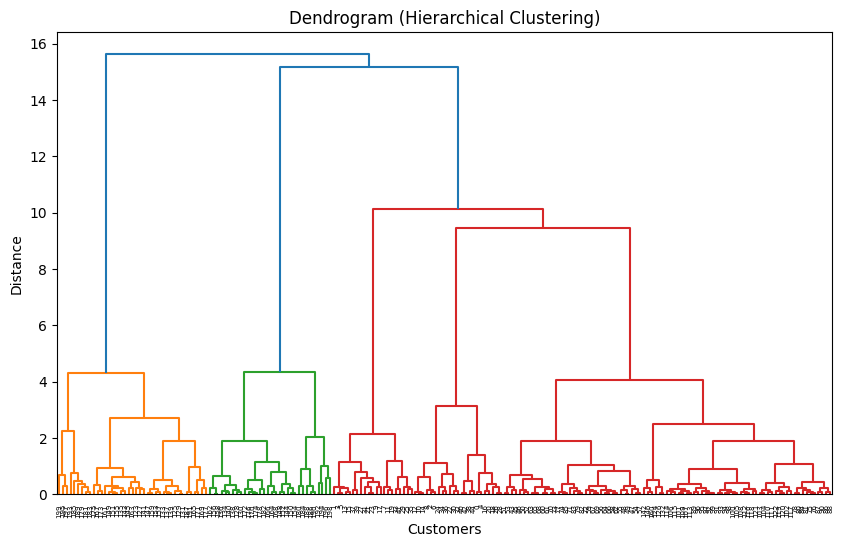

In [18]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


---

### 📌 **Insight**

* Helps decide number of clusters visually
* Shows cluster merging hierarchy

---





## 🔹 Step 12: Agglomerative Clustering

### 📝 **Task**

Apply **Agglomerative Clustering**.

---



In [19]:

agg = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg.fit_predict(X_scaled)


---

## 🔹 Step 13: DBSCAN Clustering

### 📝 **Task**

Apply **DBSCAN** to detect density-based clusters and noise.

---

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


---

### 📌 **Insight**

* `-1` represents noise points
* No need to predefine number of clusters

---



## 🔹 Step 14: Compare Clustering Results

### 📝 **Task**

Compare cluster labels from different algorithms.



In [21]:

df[['KMeans_Cluster', 'Agg_Cluster', 'DBSCAN_Cluster']].head()

,KMeans_Cluster,Agg_Cluster,DBSCAN_Cluster
0,4,4,0
1,2,3,0
2,4,4,0
3,2,3,0
4,4,4,0


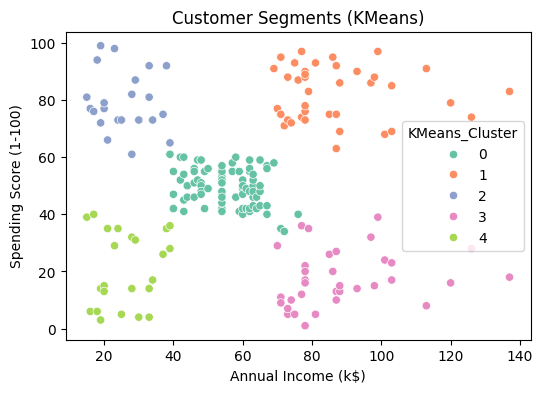

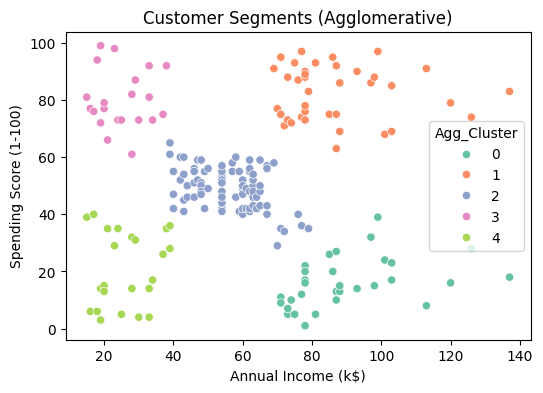

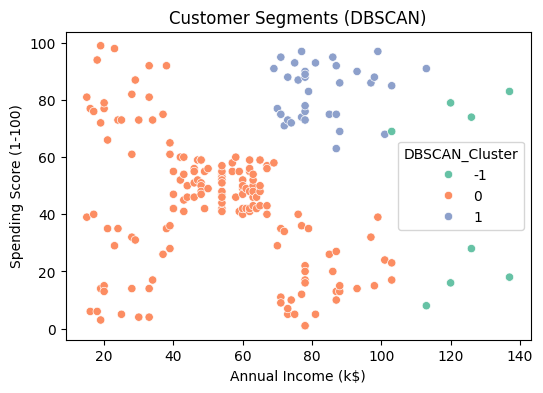

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X.iloc[:,0],
    y=X.iloc[:,1],
    hue=df['KMeans_Cluster'],
    palette='Set2'
)
plt.title("Customer Segments (KMeans)")
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X.iloc[:,0],
    y=X.iloc[:,1],
    hue=df['Agg_Cluster'],
    palette='Set2'
)
plt.title("Customer Segments (Agglomerative)")
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X.iloc[:,0],
    y=X.iloc[:,1],
    hue=df['DBSCAN_Cluster'],
    palette='Set2'
)
plt.title("Customer Segments (DBSCAN)")
plt.show()


## 🔹 Step 16: Add a Third Feature (Age)
📝 Student Task

- So far, we clustered customers using:
    - Annual Income
    - Spending Score

Now, include Age to perform 3D clustering.

In [27]:
X_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_3d.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### 📌 Insight

Adding Age gives more realistic customer segmentation

Clustering now happens in 3-dimensional feature space

## 🔹 Step 17: Scale the 3D Data
#### 📝 Student Task

Apply feature scaling to the 3D dataset.

In [28]:
scaler_3d = StandardScaler()
X_3d_scaled = scaler_3d.fit_transform(X_3d)


---

### 📌 Why This Matters

- Age and income are on very different scales

- Without scaling, Age would dominate clustering

---

## 🔹 Step 18: Apply KMeans on 3D Data
#### 📝 Student Task

Apply KMeans clustering using the same number of clusters (k = 5).

In [29]:
kmeans_3d = KMeans(n_clusters=5, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X_3d_scaled)

df['KMeans_3D_Cluster'] = clusters_3d


## 🔹 Step 19: 3D Cluster Visualization
### 📝 Student Task

Visualize the clusters in 3D space using:

- Age
- Annual Income
- Spending Score

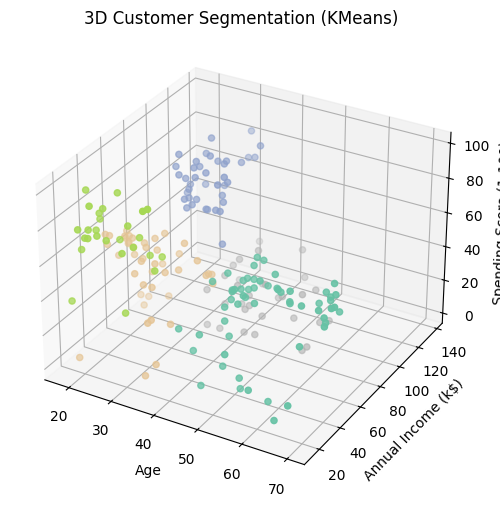

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['KMeans_3D_Cluster'],
    cmap='Set2'
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Customer Segmentation (KMeans)')

plt.show()


---
## 📌 How to Analyze This Plot (Explain to Students)

- Each point = one customer

- Color = cluster membership

- You can now see:

    - Young high spenders
    
    - Older low spenders
    
    - High income–low spending customers

- 3D clustering reveals patterns not visible in 2D

--- 

---

## 🔹 Step 20: Save the Model (For Streamlit App)

### 📝 **Task**

Save:

* KMeans model
* Scaler

---

### ✅ **Code**

```python
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


joblib.dump(kmeans_3d, "kmeans_3d_model.pkl")
joblib.dump(scaler_3d, "scaler_3d.pkl")

```

---

### 📌 **Why Save the Model?**

* Reuse without retraining
* Deploy in Streamlit
* Ensure consistent predictions

---

## 🧠 **Final Insights & Discussion (Students Write)**

1. Why is KMeans suitable for this dataset?
2. How does scaling affect clustering?
3. Which algorithm handled noise better?
4. How can businesses use these clusters?
5. Why DBSCAN does not require `k`?

In [32]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


joblib.dump(kmeans_3d, "kmeans_3d_model.pkl")
joblib.dump(scaler_3d, "scaler_3d.pkl")

['scaler_3d.pkl']